In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part-1: Data Exploration and Pre-processing

1.Load dataset

In [2]:
df=pd.read_csv('Python_Clustering_Pr(1).csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


2.Find shape of dataset

In [4]:
df.shape

(569, 32)

3.Show basic informationof data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

4.Check null values

In [8]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

5.Drop unnamed and id columns.

In [6]:
df.drop('id',axis=1,inplace=True)

6.Show values countsin diagnosis column

In [7]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

7.Remove Label column diagnosis

In [8]:
df1=df.drop('diagnosis',axis=1)

8.Create pair plot between two column radius_mean and radius_mean by diagnosis

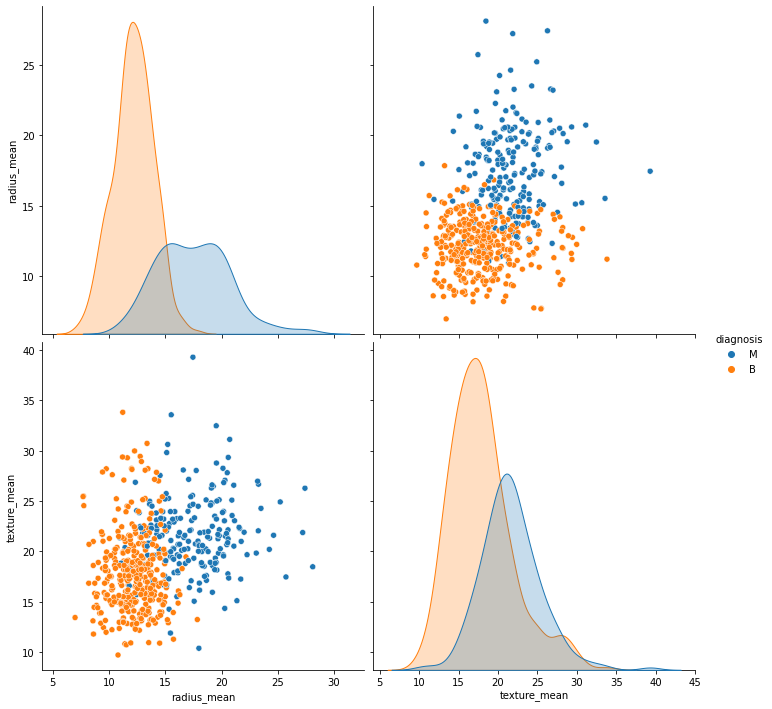

In [9]:
sns.pairplot(df.loc[:,['radius_mean','texture_mean', 'diagnosis']], hue = "diagnosis", height = 5)

9. select only two feature radius_mean & texture_mean for clustering in new dataset

In [10]:
feature=df.loc[:,['radius_mean','texture_mean']]

10.Apply scalingon new dataset

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
ss=StandardScaler()

In [13]:
ss=ss.fit(feature)

In [14]:
scaled= ss.fit_transform(feature)

In [15]:
scaled=pd.DataFrame(scaled,columns=['radius_mean','texture_mean'])

In [16]:
scaled.head()

,radius_mean,texture_mean
0,1.097064,-2.073335
1,1.829821,-0.353632
2,1.579888,0.456187
3,-0.768909,0.253732
4,1.750297,-1.151816


# Part-2: Working with Models 

1.Display hierarchical clustering as a dendrogram using scipy

In [17]:
import scipy.cluster.hierarchy as sch

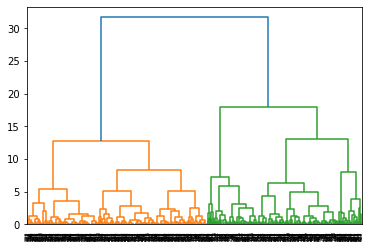

In [19]:
dendrogram= sch.dendrogram(sch.linkage(scaled, method="ward"))

2.Apply AgglomerativeClustering on dataset with 2 n number of clusters

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
hc= AgglomerativeClustering(n_clusters=2, affinity= 'euclidean', linkage='ward')

3.Predict the clusterand create new column for cluster labeldata

In [25]:
cluster= hc.fit_predict(scaled)

In [27]:
scaled['label']= cluster

In [28]:
scaled.head()

,radius_mean,texture_mean,label
0,1.097064,-2.073335,1
1,1.829821,-0.353632,0
2,1.579888,0.456187,0
3,-0.768909,0.253732,1
4,1.750297,-1.151816,0


4.Check count of label

In [30]:
scaled.label.value_counts()

1    306
0    263
Name: label, dtype: int64

5.Plot the labeldata

Text(0, 0.5, 'texture_mean')

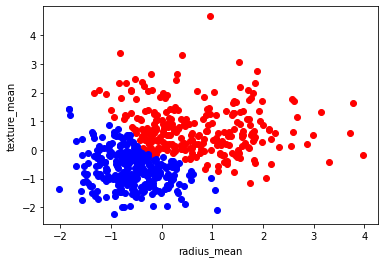

In [37]:
plt.scatter(scaled["radius_mean"][scaled.label==0], scaled["texture_mean"] [scaled.label==0], color = "red")
plt.scatter(scaled["radius_mean"] [scaled.label==1], scaled["texture_mean"] [scaled.label==1], color = "blue")
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')

6.Check the silhouette score

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
scor= silhouette_score(scaled,cluster)

In [40]:
print(scor)

0.4717861439453535


7.Now apply kmeans clustering no dataset with 2 number of clusters

In [42]:
from sklearn.cluster import KMeans

In [43]:
km= KMeans(n_clusters=2)

In [44]:
km.fit(feature)

KMeans(n_clusters=2)

8.Check wcss score

In [45]:
wcss = km.inertia_

In [46]:
print(wcss)

9403.76824064772


9.Try differentN number from 1 to 10 and plot the result of wcss score

In [48]:
WCSS=[]

for i in range (1,11):
    km=KMeans(n_clusters=i)
    km.fit(feature)
    WCSS.append(km.inertia_)

In [49]:
print(WCSS)

[17561.326763272402, 9403.768240647722, 6746.6175187960935, 5152.175197091657, 4347.367856338578, 3658.4328057878774, 3196.5084565028988, 2819.749440372677, 2572.4627794496187, 2343.852447443588]


Text(0.5, 1.0, 'Elbow')

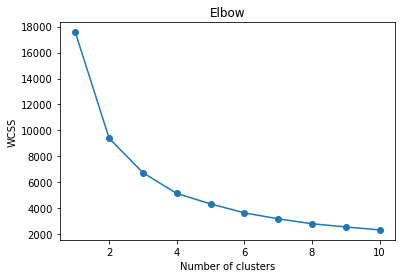

In [54]:
plt.plot(range(1,11),WCSS, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow')

10.Apply kmeans again with different no. of cluster according to best wcss score.

In [56]:
kmeans= KMeans(n_clusters=4)

In [57]:
kmean=kmeans.fit_predict(feature)

11.Create column for label cluster

In [59]:
feature['label']=kmean

In [60]:
feature.head()

,radius_mean,texture_mean,label
0,17.99,10.38,1
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,2
4,20.29,14.34,0
